<img width="800px" src="../fidle/img/00-Fidle-header-01.svg"></img>

# <!-- TITLE --> [GRAD1] - Linear regression with gradient descent
<!-- DESC --> An example of gradient descent in the simple case of a linear regression.
<!-- AUTHOR : Jean-Luc Parouty (CNRS/SIMaP) -->


## Objectives :
 - To illustrate the iterative approach of a gradient descent

## What we're going to do :

Equation : $ Y = X.\Theta + N$  
Where N is a noise vector
and $\Theta = (a,b)$ a vector as y = a.x + b

We will calculate a loss function and its gradient.  
We will descend this gradient in order to find a minimum value of our loss function.

$
\triangledown_\theta MSE(\Theta)=\begin{bmatrix}
\frac{\partial}{\partial \theta_0}MSE(\Theta)\\
\frac{\partial}{\partial \theta_1}MSE(\Theta)\\
\vdots\\
\frac{\partial}{\partial \theta_n}MSE(\Theta)
\end{bmatrix}=\frac2m X^T\cdot(X\cdot\Theta-Y)
$  

and :  

$\Theta \leftarrow \Theta - \eta \cdot \triangledown_\theta MSE(\Theta)$

where $\eta$ is the learning rate

## Step 1 - Import


In [1]:
import numpy as np
import sys

from modules.RegressionCooker import RegressionCooker 

## Step 2 - Instanciate

In [2]:
cooker = RegressionCooker()


FIDLE 2020 - Regression Cooker
Version      : 0.1
Run time     : Saturday 22 February 2020, 12:17:36


## Step 2 - Get a dataset

### Dataset :

X shape : (1000000, 1)  Y shape : (1000000, 1)  plot : 1000 points


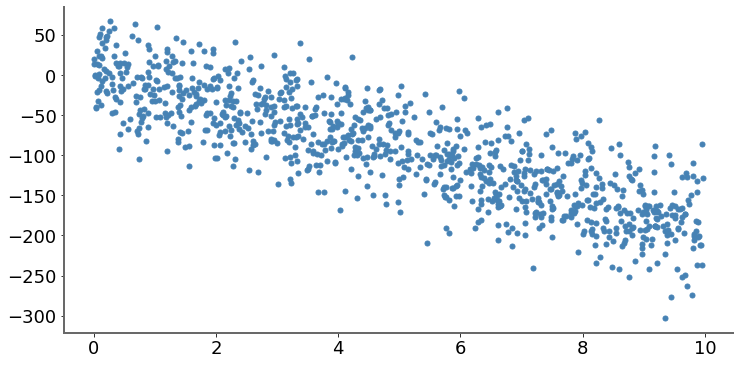

X                :      mean=   4.999  std=   2.888    min=   0.000    max=  10.000
Y                :      mean= -94.002  std=  66.170    min=-350.802    max= 152.809


In [3]:
X,Y = cooker.get_dataset(1000000)

cooker.plot_dataset(X,Y)

## Step 3 : Data normalization

In [4]:
X_norm     = ( X - X.mean() ) / X.std()
Y_norm     = ( Y - Y.mean() ) / Y.std()

cooker.vector_infos('X origine',X)
cooker.vector_infos('X normalized',X_norm)

X origine        :      mean=   4.999  std=   2.888    min=   0.000    max=  10.000
X normalized     :      mean=  -0.000  std=   1.000    min=  -1.731    max=   1.732


## Step 4 - Basic descent

### Basic gradient descent :

**With :**  

with :
    epochs = 200
    eta    = 0.01


**epochs :**  

    #i   Loss       Gradient         Theta
    0  +16.062   -7.762  +1.658   -3.803  -0.017
   20   +7.332   -5.182  +1.107   -2.539  -0.287
   40   +3.441   -3.459  +0.739   -1.695  -0.467
   60   +1.707   -2.310  +0.493   -1.132  -0.587
   80   +0.934   -1.542  +0.329   -0.756  -0.668
  100   +0.590   -1.029  +0.220   -0.504  -0.721
  120   +0.436   -0.687  +0.147   -0.337  -0.757
  140   +0.368   -0.459  +0.098   -0.225  -0.781
  160   +0.337   -0.306  +0.065   -0.150  -0.797
  180   +0.324   -0.204  +0.044   -0.100  -0.808
  200   +0.318   -0.137  +0.029   -0.067  -0.815


**Visualization :**  

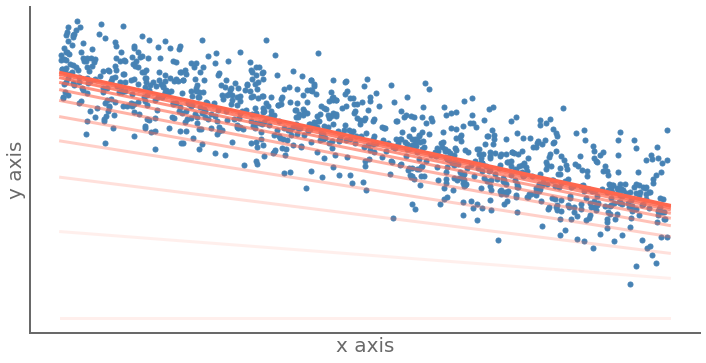

**Loss :**  

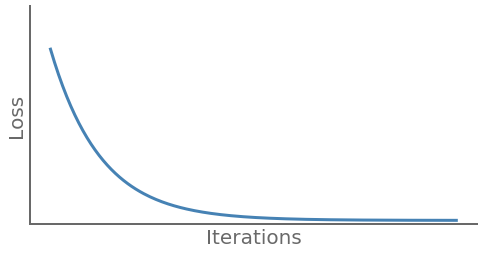

In [5]:
theta = cooker.basic_descent(X_norm, Y_norm, epochs=200, eta=0.01)

## Step 5 - Minibatch descent

### Mini batch gradient descent :

**With :**  

with :
    epochs     = 10
    batchs     = 20
    batch size = 10
    eta        = 0.01


**epochs :**  

    #i   Loss       Gradient         Theta
    0   +0.515   -1.066  +2.124   +0.080  -0.723
    1   +0.213   +0.436  -1.819   -0.021  -0.768
    2   +0.371   -0.782  +0.725   +0.001  -0.798
    3   +0.434   +4.678  -4.889   +0.021  -0.805
    4   +0.535   +7.947  -0.935   +0.048  -0.790
    5   +0.498   +0.313  -5.674   +0.026  -0.803
    6   +0.373   +2.340  -4.394   +0.020  -0.784
    7   +0.307   -4.933  +7.125   +0.007  -0.811
    8   +0.277   -1.578  -2.536   -0.001  -0.826
    9   +0.281   -0.940  -0.107   -0.001  -0.845


**Visualization :**  

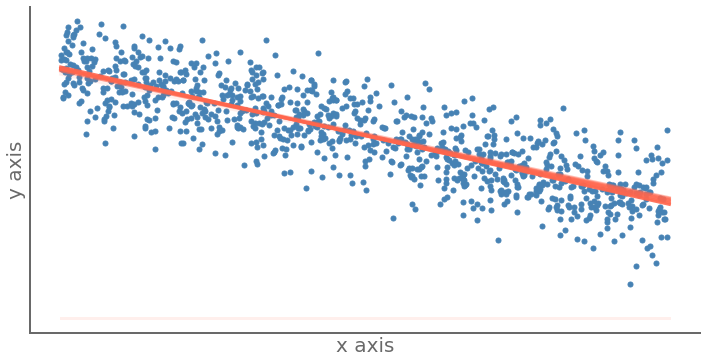

**Loss :**  

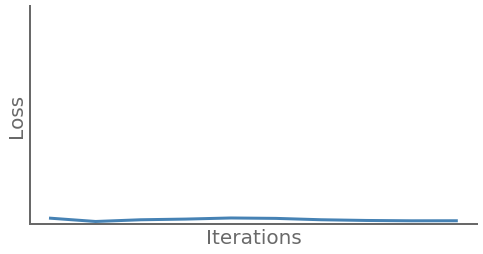

In [6]:
theta = cooker.minibatch_descent(X_norm, Y_norm, epochs=10, batchs=20, batch_size=10, eta=0.01)

---
<img width="80px" src="../fidle/img/00-Fidle-logo-01.svg"></img>